In [203]:
import pandas as pd 
import keras
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.metrics import mean_squared_error

In [204]:
data = pd.read_csv(r'dataset/Electric_Production.csv')

In [205]:
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [206]:
data.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


<Axes: xlabel='DATE'>

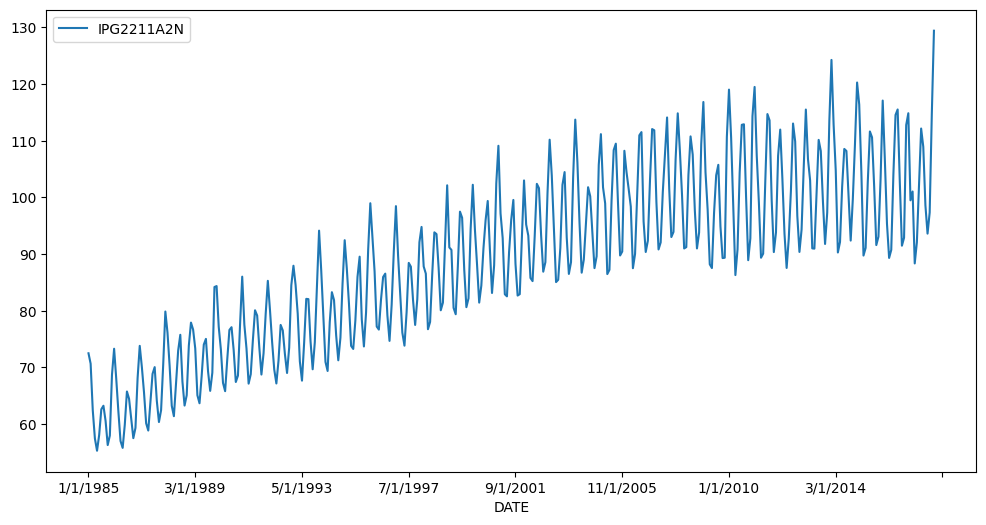

In [207]:
data.plot(figsize=(12,6),x='DATE', y='IPG2211A2N')

In [208]:
data.shape

(397, 2)

In [209]:
series = data['IPG2211A2N'].values.reshape(-1, 1)

preprocessamento

In [210]:
min_max  = MinMaxScaler()
series_m = min_max.fit_transform(series)

In [211]:
from keras.preprocessing.sequence import TimeseriesGenerator, 

In [221]:
generator = TimeseriesGenerator(
    data=series_m, targets=series, length=50, batch_size=32
)

In [231]:
print(len(generator))

11


In [224]:
train_size = int(len(generator) * 0.8)

train_generator = generator[:train_size]
test_generator = generator[train_size:]

8


TypeError: unsupported operand type(s) for *: 'int' and 'slice'

In [216]:
model = keras.models.Sequential(
    layers=[
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.Dense(1)
    ]
)

In [217]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss     =keras.losses.mse
)
model.fit(
    generator, epochs=50, batch_size=1
)

Epoch 1/50
132/132 [==============================] - 4s 4ms/step - loss: 7573.1143
Epoch 2/50
132/132 [==============================] - 0s 3ms/step - loss: 6510.0640
Epoch 3/50
132/132 [==============================] - 1s 4ms/step - loss: 5852.6216
Epoch 4/50
132/132 [==============================] - 1s 4ms/step - loss: 5379.2935
Epoch 5/50
132/132 [==============================] - 0s 3ms/step - loss: 4969.6763
Epoch 6/50
132/132 [==============================] - 1s 4ms/step - loss: 4598.6870
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 4256.1768
Epoch 8/50
132/132 [==============================] - 0s 3ms/step - loss: 3937.8679
Epoch 9/50
132/132 [==============================] - 0s 3ms/step - loss: 3641.2407
Epoch 10/50
132/132 [==============================] - 0s 3ms/step - loss: 3363.8936
Epoch 11/50
132/132 [==============================] - 0s 3ms/step - loss: 3104.7520
Epoch 12/50
132/132 [==============================] - 1s 4ms/step - loss: